In [25]:
from random import randint

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Loading fashion_mnist data from keras dataset


In [27]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [28]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [29]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [30]:
train_labels[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [31]:
lookup = [
    'T-shirt/top',  # Class 0
    'Trouser',  # Class 1
    'Pullover',  # Class 2
    'Dress',  # Class 3
    'Coat',  # Class 4
    'Sandal',  # Class 5
    'Shirt',  # Class 6
    'Sneaker',  # Class 7
    'Bag',  # Class 8
    'Ankle boot'  # Class 9
]

### Displaying image

In [32]:
def show_img(images, labels, n_images):

    random_int = randint(0, labels.shape[0] - n_images)

    imgs, labels = images[random_int : random_int + n_images], \
        labels[random_int : random_int +  n_images]

    _, figs = plt.subplots(1, n_images, figsize=(n_images * 3, 3))

    for fig, img, label in zip(figs, imgs, labels):
        fig.imshow(img)
        ax = fig.axes

        ax.set_title(lookup[int(label)])

        ax.title.set_fontsize(20)

        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

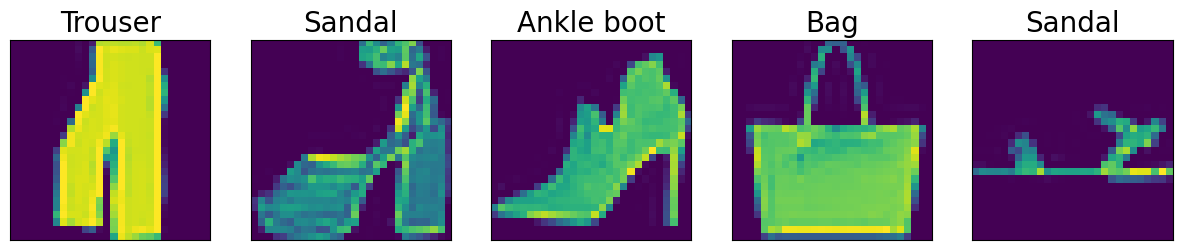

In [33]:
show_img(train_images, train_labels, 5)

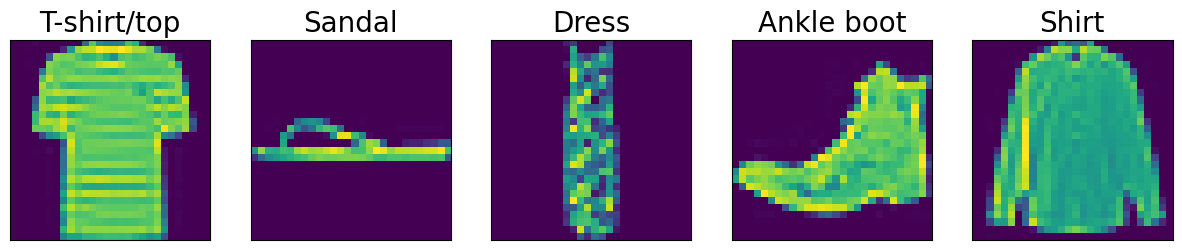

In [34]:
show_img(train_images, train_labels, 5)

### Saving images in respective folder


In [41]:
train_dir = './datasets/train/'
test_dir = './datasets/test/'

In [36]:
i = 0

for img, label in zip(train_images, train_labels):

    path = train_dir + str(lookup[int(label)])

    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)

    i += 1
    cv2.waitKey(0)

In [37]:
i = 0

for img, label in zip(test_images, test_labels):

    path = test_dir + str(lookup[int(label)])

    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)

    i += 1

    cv2.waitKey(0)


### Data Preparation

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

* Read images from the disk.
* Decode contents of these images and convert it into proper grid format as per their RGB content.
* Convert them into floating point tensors.
* Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the `ImageDataGenerator` class provided by tf.keras.


In [38]:
train_image_generator = ImageDataGenerator(rescale=1./255)

test_image_generator = ImageDataGenerator(rescale=1./255)

After defining the generators for training and validation images, the flow_from_directory method loads images from the disk, applies rescaling, and resizes the images into the required dimension. We haven't applied any data augmentation techniques here, we'll work with the images as is.


In [39]:
batch_size = 128

In [40]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(32, 32))

FileNotFoundError: [WinError 3] The system cannot find the path specified: './datasets/train/'

False
